<center><img src="img/EdTech_logo.png" style="width: 500px;"/></center>

Notre start-up de la EdTech, nommée **academy**, propose des contenus de formation en ligne pour un public de niveau lycée et université. Dans le cadre de notre projet d’expansion à l’international de l’entreprise, nous avons réalisé une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer sur ce projet.  

**Les objectifs sont :**
- Déterminer les pays avec un fort potentiel de clients pour nos services.
- Évaluer l’évolution de ce potentiel de clients.
- Les pays dans lesquels l'entreprise doit opérer en priorité.


**Les données :**

Les données que nous utiliserons proviennent de la Banque mondiale **The World Bank** “EdStats All Indicator Query” disponible à l'adresse suivante :  https://datacatalog.worldbank.org/dataset/education-statistics . Elle répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation..

Nous disposons de 5 fichiers :

<center><img src="img/Vue_ens_fichiers.png" style="width: 1000px;"/></center>

**Les indicateurs :**

Pour répondre à nos objectifs, nous allons choisir des indicateurs qui pourront apporter une aide dans la segmentation des populations. Nous choisissons 3 axes :
- Population étudiante
- PIB moyen (financement des études)
- Connectivité à internet
!!! A Développer

Nous allons donc :  
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

---

# Importation des librairies

In [1]:
#!pip freeze > requirements.txt

In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

In [3]:
# Versions 
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


In [4]:
%%html
<style>
    table {float:left}
</style>

Instalation des librairies :

In [5]:
#!pip install -r requirements.txt

---

# Importation des données

## Données EdStatsData

EdStatsData contient des valeurs par indicateurs, par an et par pays.

In [6]:
df_stats = pd.read_csv('data/EdStatsData.csv')
df_stats.sample(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
778810,Sweden,SWE,PASEC: Mean performance on the mathematics scale for 6th grade students who did not attend pre-primary education,LO.PASEC.MAT.6.NPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622053,Nigeria,NGA,SABER: (Education Management Information Systems) Policy Goal 3: Quality data,SABER.EMIS.GOAL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
!head -1 data/EdStatsData.csv

﻿"Country Name","Country Code","Indicator Name","Indicator Code","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100",


> La colonne "Unnamed: 69" s'explique par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un soucis de formatage du fichier csv.

In [8]:
df_stats = df_stats.drop(columns='Unnamed: 69')

### Description des données

| Variables | Définition |
| --- | --- |
| Country Name | Nom du pays (ou de la région) |
| Country Code | Code du pays |
| Indicator Name | Nom de l'indicateur |
| Indicator Code | Code de l'indicateur |
| 1970-2100 | Valeurs par années |

In [9]:
print("")
print("EdStatsData")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats.shape[0],df_stats.shape[1]))

duplicates = df_stats.duplicated(subset=["Country Code","Indicator Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_stats['Country Code'].unique())))
print("{} indicateurs uniques.".format(len(df_stats['Indicator Code'].unique())))
print("")


EdStatsData
----------------------------------
886930 entrées et 69 variables.
Absence de données dupliquées.
242 Country Code référencés.
3665 indicateurs uniques.



### Données manquantes

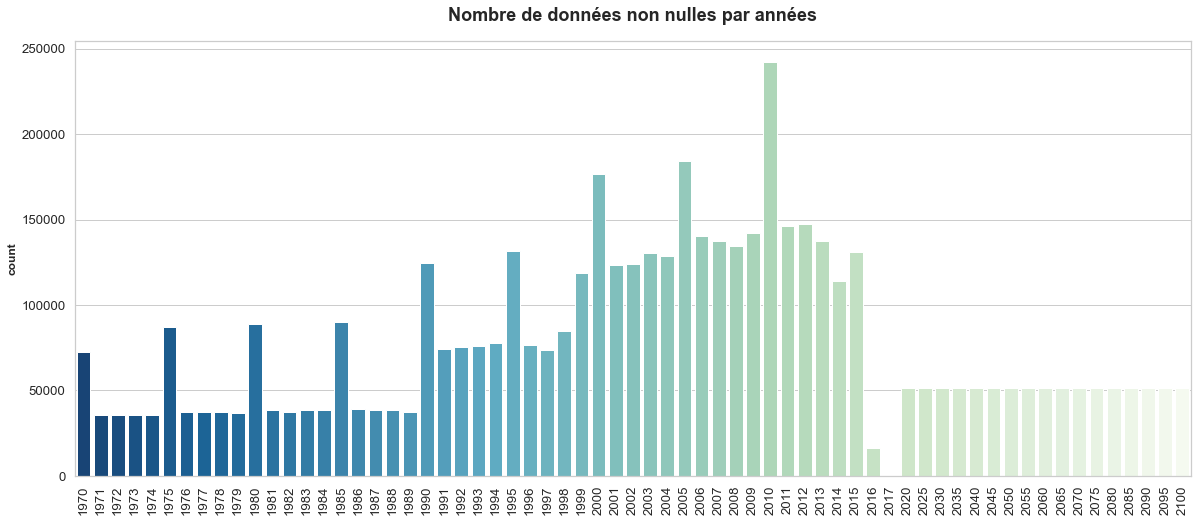

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df_stats, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Les années 2016 et 2017 ne présente pas un nombre de données suffisantes. Les années de 2020 à 2100 semblent être des données prédictives.
> Nous allons garder comme plage d'année **2000 à 2015** au vu du nombre de leurs valeurs nulles.  

## Données EdStatsSeries

EdStatsSeries contient des informations sur les indicateurs. Nous allons voir quelles informations peuvent être retenus pour nous aider dans le traitement de nos indicateurs.

In [11]:
df_stats_series = pd.read_csv('data/EdStatsSeries.csv')
df_stats_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
!head -1 data/EdStatsSeries.csv

﻿"Series Code","Topic","Indicator Name","Short definition","Long definition","Unit of measure","Periodicity","Base Period","Other notes","Aggregation method","Limitations and exceptions","Notes from original source","General comments","Source","Statistical concept and methodology","Development relevance","Related source links","Other web links","Related indicators","License Type",


In [13]:
df_stats_series = df_stats_series.drop(columns='Unnamed: 20')

### Description des données

In [14]:
print(df_stats_series.info())

print("")
print("EdStatsSeries")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats_series.shape[0],df_stats_series.shape[1]))

duplicates = df_stats_series.duplicated(subset=["Series Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("Nombre de Topic : {}".format(len(df_stats_series['Topic'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Données manquantes

Nous gardons les colonnes qui contiennet suffisament de données.

In [15]:
df_stats_series_selected = df_stats_series.drop(columns = df_stats_series.loc[:,'Unit of measure':'General comments'])
df_stats_series_selected = df_stats_series_selected.drop(columns=df_stats_series_selected.loc[:,'Statistical concept and methodology':'License Type'])

In [16]:
df_stats_series_selected.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


## Données EdStatsCountry

In [17]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [18]:
!head -1 data/EdStatsCountry.csv

﻿"Country Code","Short Name","Table Name","Long Name","2-alpha code","Currency Unit","Special Notes","Region","Income Group","WB-2 code","National accounts base year","National accounts reference year","SNA price valuation","Lending category","Other groups","System of National Accounts","Alternative conversion factor","PPP survey year","Balance of Payments Manual in use","External debt Reporting status","System of trade","Government Accounting concept","IMF data dissemination standard","Latest population census","Latest household survey","Source of most recent Income and expenditure data","Vital registration complete","Latest agricultural census","Latest industrial data","Latest trade data","Latest water withdrawal data",


In [19]:
df_country = df_country.drop(columns='Unnamed: 31')

### Description des données

In [20]:
print(df_country.info())

print("")
print("EdStatsCountry")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country.shape[0],df_country.shape[1]))

duplicates = df_country.duplicated(subset=["Country Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country['Country Code'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Données manquantes

In [21]:
df_country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

> Nous observons qu'il y a 27 valeurs manquantes pour la variable "Region". Le nombre d'entrées est de 241, hors selon l'ONU, il y a 197 Etats dans le monde. La liste des "Country" sans nom de région, semblerai donc indiquer qu'il s'agit de régions.

**Données de régions :**

In [22]:
list_region_income_group = df_country[df_country['Region'].isnull()]['Short Name'].unique()

list_income_groups = [x for x in list_region_income_group if x.endswith('income')]
list_regions = [x for x in list_region_income_group if not x.endswith('income')]

print("")
print("Il y a {} 'Country Code' référencés.".format(len(df_country['Country Code'].unique())))
print("Nombre d'entreés ne possédant pas de région : {}".format(len(list_region_income_group)))

print("")
print("Liste des income levels :")
print("----------------------------------")
print(*list_income_groups, sep = "\n")

print("")
print("Liste des régions :")
print("----------------------------------")
print(*list_regions, sep = "\n")


Il y a 241 'Country Code' référencés.
Nombre d'entreés ne possédant pas de région : 27

Liste des income levels :
----------------------------------
High income
Low income
Lower middle income
Low & middle income
Middle income
Upper middle income

Liste des régions :
----------------------------------
Arab World
East Asia & Pacific (developing only)
East Asia & Pacific (all income levels)
Europe & Central Asia (developing only)
Europe & Central Asia (all income levels)
Euro area
European Union
Gibraltar
Heavily indebted poor countries (HIPC)
Latin America & Caribbean (developing only)
Latin America & Caribbean (all income levels)
Least developed countries: UN classification
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
North America
Nauru
OECD members
South Asia
Sub-Saharan Africa (developing only)
Sub-Saharan Africa (all income levels)
World


In [23]:
country_by_income_grp = df_country.groupby('Income Group')[['Short Name']].count().reset_index()
country_by_income_grp = country_by_income_grp.sort_values(by='Short Name', ascending=False)

country_by_region = df_country.groupby('Region')[['Short Name']].count().reset_index()
country_by_region = country_by_region.sort_values(by='Short Name', ascending=False)
print(country_by_region.head(5))

                       Region  Short Name
1       Europe & Central Asia          57
6          Sub-Saharan Africa          48
2   Latin America & Caribbean          41
0         East Asia & Pacific          36
3  Middle East & North Africa          21


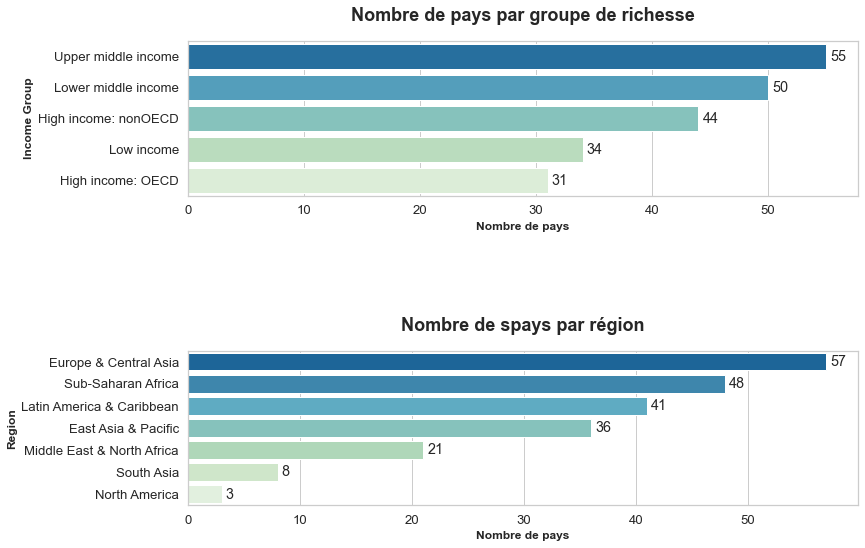

In [24]:
plt.subplot(2,1,1)
ax = sns.barplot(data=country_by_income_grp, x="Short Name", y="Income Group", palette="GnBu_r")
ax.set_title('Nombre de pays par groupe de richesse')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplot(2,1,2)
ax = sns.barplot(data=country_by_region, x="Short Name", y="Region", palette="GnBu_r")
ax.set_title('Nombre de spays par région')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplots_adjust(top=1.2, hspace = 1, wspace = 1)
plt.show()

> Nous pouvons utiliser les données **EdStatsCountry** pour segementer nos données **EdStatsData** par pays et par régions.

## Données EdStatsCountrySeries

In [25]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [26]:
!head -1 data/EdStatsCountry-Series.csv

﻿"CountryCode","SeriesCode","DESCRIPTION",


In [27]:
df_country_series = df_country_series.drop(columns='Unnamed: 3')

### Description des données

In [28]:
df_country_series.info()

print("")
print("EdStatsCountry-Series")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country_series.shape[0],df_country_series.shape[1]))

duplicates = df_country_series.duplicated(subset=["CountryCode"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country_series['CountryCode'].unique())))

list_country_series_code = list(df_country_series['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_country_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB

EdStatsCountry-Series
----------------------------------
613 entrées et 3 variables.
Présence de données dupliquées.
211 Country Code référencés.
21 indicateurs uniques.


### Données manquantes

In [29]:
# List of indicators
print(list_country_series_code)

['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO', 'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN']


In [30]:
countries_by_indicator = df_country_series.groupby('SeriesCode').count().reset_index()
countries_by_indicator = countries_by_indicator.sort_values(by='CountryCode', ascending=False)

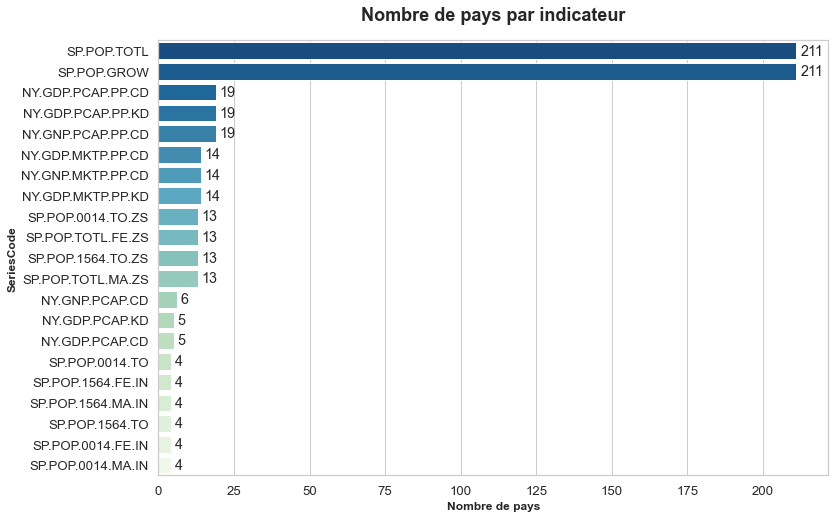

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title('Nombre de pays par indicateur')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> Nous garderons pour notre analyse les indicateurs **SP.POP.TOTL** et **SP.POP.GROW**.

In [32]:
list_country_series_code.remove('SP.POP.TOTL')
list_country_series_code.remove('SP.POP.GROW')

df_stats_selected = df_stats[~df_stats['Indicator Code'].isin(list_country_series_code)]

## Données EdStatsFootNote

In [33]:
df_foot_note = pd.read_csv('data/EdStatsFootNote.csv')
df_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [34]:
!head -1 data/EdStatsFootNote.csv

﻿"CountryCode","SeriesCode","Year","DESCRIPTION",


In [35]:
df_foot_note = df_foot_note.drop(columns='Unnamed: 4')

### Description des données

In [36]:
print(df_foot_note.info())

print("")
print("EdStatsFootNote")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_foot_note.shape[0],df_foot_note.shape[1]))

duplicates = df_foot_note.duplicated(subset=["CountryCode"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_foot_note['CountryCode'].unique())))

list_foot_note_series_code = list(df_foot_note['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_foot_note_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB
None

EdStatsFootNote
----------------------------------
643638 entrées et 4 variables.
Présence de données dupliquées.
239 Country Code référencés.
1558 indicateurs uniques.


### Répartition des données

In [37]:
df_foot_note_by_year = df_foot_note
df_foot_note_by_year['year_formated'] = df_foot_note_by_year['Year'].apply(lambda x : x[-4:]).astype('int')
df_foot_note_by_year = df_foot_note_by_year.groupby('year_formated').count().reset_index()

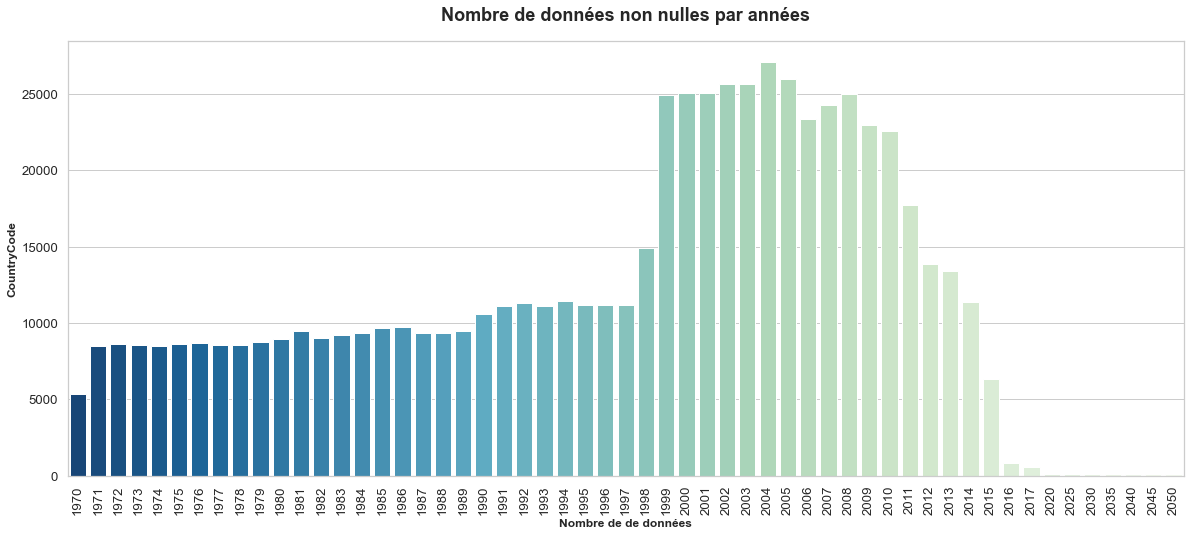

In [38]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="year_formated", y="CountryCode", data=df_foot_note_by_year, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.set(xlabel='Years')
ax.set(xlabel='Nombre de de données')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [39]:
foot_note_countries_by_indicator = df_foot_note.groupby('SeriesCode')[['CountryCode']].count().reset_index()
foot_note_countries_by_indicator = foot_note_countries_by_indicator.sort_values(by='CountryCode', ascending=False)
foot_note_countries_by_indicator = foot_note_countries_by_indicator.head(15)

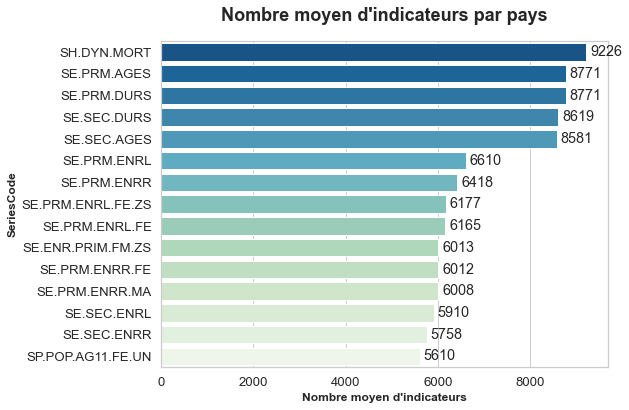

In [40]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=foot_note_countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> ?????

# Nettoyage des données et sélection des indicateurs

In [41]:
# initialize list of selected indicators
list_indicator_selected = []

On fusionne les données de EdStatsData avec EdStatsSeries. 

In [42]:
df_stats_series_selected.rename(columns = {'Series Code' : 'Indicator Code'}, inplace=True)
df_stats_selected = df_stats_selected.merge(df_stats_series_selected, how='inner', on='Indicator Code')

df_stats_selected = df_stats_selected.drop(columns=['Indicator Name_y'])
df_stats_selected.rename(columns = {'Indicator Name_x' : 'Indicator Name'}, inplace=True)

**Indicateurs par genre :**

En faisant une recherche sur les indicateurs, on remarque que ces derniers sont déclinés en sous-indicateurs :
- par genre (femme ou homme)
- par tranche d'âge
- par régions

Par genre :
- contiennent : "F", "M", "FE", MA"
- se terminent par : "F", "M", "FE", "GPI", "MA", "FE.ZS", "MA.ZS"

On crée une fonction qui servira à discréditer les genres sur les inficateurs étudiés :

In [43]:
def drop_gender(dataframe):
    result = dataframe[~dataframe['Indicator Code'].str.endswith((
        '.F','.M','.GPI','FE','MA','FE.ZS','MA.ZS'))]

    result = result[~result['Indicator Code'].str.contains(
        ".F.|.M.|.FE.|.MA.|.AG", regex=True)]
    
    return result


## Par années

Nous avons sélectionné les années de 2000 à 2015 pour les données EdStatsData :

In [44]:
df_stats_selected = df_stats_selected.drop(columns = df_stats_selected.loc[:,'1970':'1999'])
df_stats_selected = df_stats_selected.drop(columns=df_stats_selected.loc[:,'2016':'2100'])

> Nous avons maintenant des données sur une période ciblée. Il y a cependant un grand nombre d'incateurs par Country Code et de valeurs manquantes. Nous devons sélectionner les indicateurs les plus pertinents qui participerons à répondre à nos problématiques.

## Suppression des lignes vide

In [45]:
list_columns = list(df_stats_selected.loc[:,"2000":"2015"])
df_stats_selected = df_stats_selected.dropna(how="all", subset=list_columns)

## Dernières valeurs disponibles

In [46]:
df_stats_lv = df_stats_selected.copy()

In [47]:
df_stats_years_values = df_stats_selected.loc[:,'2000':'2015']
df_stats_lv['Last Avail Values'] = df_stats_years_values.fillna(method='ffill', axis=1).iloc[:, -1]

df_stats_lv = df_stats_lv.drop(columns = df_stats_lv.loc[:,"2000":"2015"])
df_stats_lv.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Topic,Short definition,Long definition,Source,Last Avail Values
25,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,Secondary,NaN,"Total number of students of the official lower secondary school age group who are enrolled in lower secondary education or higher, expressed as a percentage of the corresponding population. Divide the total number of students in the official lower secondary school age range who are enrolled in lower secondary education or higher by the population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official school participation age group for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.",UNESCO Institute for Statistics,50.627232


## Par âge

Nous allons cibler les indicateurs d'âge sur une population jeune en dessous de 25 ans.

Par exemple :

In [48]:
df_temp_age = df_stats_lv[df_stats_lv['Indicator Code'].str.contains('4549')]
df_temp_age = df_temp_age['Long definition'].unique()
df_temp_age[0]

'Average years of primary schooling, 45-49, female is the average years of primary education completed among females age 45-49.'

Filtre :

In [49]:
age_range_to_drop = '15UP|25UP|2529|3034|3539|4044|4549|5054|5559|6064|6569|7074|75UP'

df_stats_lv = df_stats_lv[~df_stats_selected['Indicator Code'] \
                            .str.contains(age_range_to_drop, regex=True)]

In [50]:
df_temp_age_g = df_stats_lv[df_stats_lv['Indicator Code'].str.endswith('UN')]
df_temp_age = drop_gender(df_temp_age_g)
list_temp_age = list(df_temp_age['Indicator Code'].unique())
print(list_temp_age)

['SP.POP.1014.TO.UN', 'SP.POP.1015.TO.UN', 'SP.POP.1016.TO.UN', 'SP.POP.1017.TO.UN', 'SP.POP.1018.TO.UN', 'SP.POP.1115.TO.UN', 'SP.POP.1116.TO.UN', 'SP.POP.1117.TO.UN', 'SP.POP.1118.TO.UN', 'SP.POP.1215.TO.UN', 'SP.POP.1216.TO.UN', 'SP.POP.1217.TO.UN', 'SP.POP.1218.TO.UN', 'SP.POP.1316.TO.UN', 'SP.POP.1317.TO.UN', 'SP.POP.1318.TO.UN', 'SP.POP.1319.TO.UN', 'SP.POP.1418.TO.UN', 'SP.POP.1419.TO.UN', 'SP.POP.1524.TO.UN', 'SP.POP.0305.TO.UN', 'SP.POP.0406.TO.UN', 'SP.POP.0510.TO.UN', 'SP.POP.0511.TO.UN', 'SP.POP.0509.TO.UN', 'SP.POP.0610.TO.UN', 'SP.POP.0611.TO.UN', 'SP.POP.0612.TO.UN', 'SP.POP.0609.TO.UN', 'SP.POP.0710.TO.UN', 'SP.POP.0711.TO.UN', 'SP.POP.0712.TO.UN', 'SP.POP.0713.TO.UN', 'SP.POP.0709.TO.UN']


Nous garderons comme indicateur : **SP.POP.1524.TO.UN**

In [51]:
list_temp_age_g = list(df_temp_age['Indicator Code'].unique())
list_temp_age_g.remove('SP.POP.1524.TO.UN')

df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].isin(list_temp_age_g)]

list_indicator_selected.append('SP.POP.1524.TO.UN')

## Par catégories (Topic)

In [52]:
list_topics = df_stats_lv['Topic'].unique()
print(*list_topics, sep = "\n")

Secondary
Primary
Literacy
Teachers
EMIS
Expenditures
Attainment
Education Equality
Background
Learning Outcomes
Early Childhood Education
Tertiary
Post-Secondary/Non-Tertiary
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
Pre-Primary
Infrastructure: Communications
Social Protection & Labor: Labor force structure
Health: Mortality
Health: Population: Dynamics
Population
Health: Population: Structure
Health: Risk factors
Early Child Development (SABER)
Education Management Information Systems (SABER)
Engaging the Private Sector (SABER)
School Autonomy and Accountability (SABER)
School Finance (SABER)
School Health and School Feeding (SABER)
Student Assessment (SABER)
Teachers (SABER)
Workforce Development (SABER)
Laber
Social Protection & Labor: Unemployment


### Catégories hors sujet

Par rapport à notre contexte, certains Topic ne vont pas nous apporter d'informations. On retrouve des catégories concernant la santé, l'égalité ou les protections sociales.

In [53]:
list_topic_to_remove = [
    'Primary',
    'Literacy',
    'Teachers',
    'Expenditures',
    'Education Equality',
    'Background',
    'Early Childhood Education',
    'Economic Policy & Debt: Purchasing power parity',
    'Pre-Primary',
    'Health: Risk factors',
    'Health: Mortality',
    'Social Protection & Labor: Labor force structure',
    'Social Protection & Labor: Unemployment',
    'Health: Population: Structure',
    'Health: Population: Dynamics'
]

df_stats_lv = df_stats_lv[~df_stats_lv['Topic'].isin(list_topic_to_remove)]

### Catégories les plus représentées

In [54]:
data_by_topic = df_stats_lv.groupby('Topic')[['Country Code']].count().reset_index()
data_by_topic = data_by_topic.sort_values(by='Country Code', ascending=False)

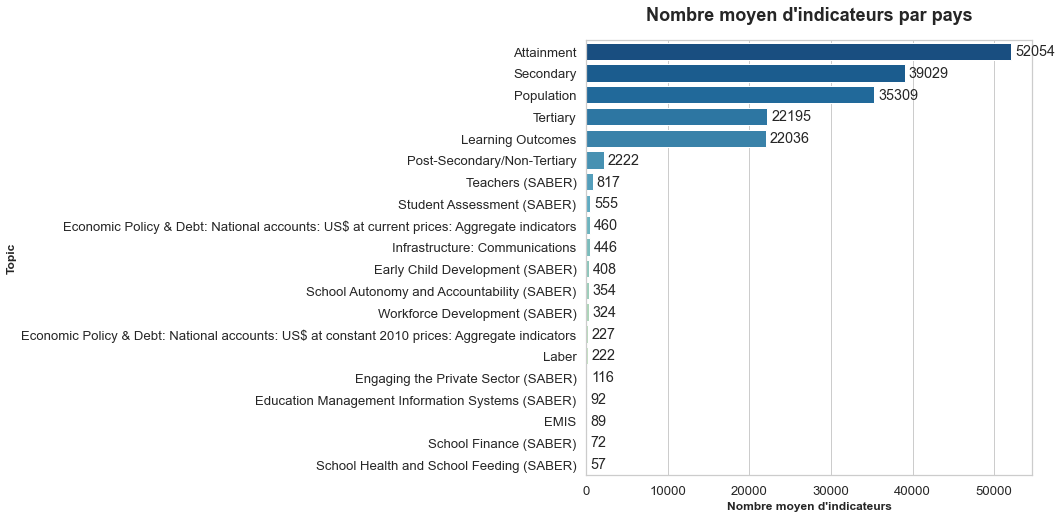

In [55]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=data_by_topic, x="Country Code", y="Topic", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

### Secondary

On va cibler ici les étudiants de lycée ce qui correspond au "Secondary upper".

In [56]:
df_temp_sec_g = df_stats_lv[df_stats_lv['Topic']=='Secondary']
df_temp_sec = drop_gender(df_temp_sec_g)
df_temp_sec = df_temp_sec.drop_duplicates(['Indicator Code'])
df_temp_sec = df_temp_sec[df_temp_sec['Long definition'].str.contains("upper")]
df_temp_sec[["Indicator Name", "Indicator Code", "Long definition"]]

,Indicator Name,Indicator Code,Long definition
1961,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3,"Total number of students of the official upper secondary school age group who are enrolled in upper secondary education or higher, expressed as a percentage of the corresponding population. Divide the total number of students in the official upper secondary school age range who are enrolled in upper secondary education or higher by the population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official school participation age group for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes."
288464,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,Total number of students enrolled in public and private upper secondary education institutions regardless of age.
288973,"Enrolment in upper secondary education, private institutions, both sexes (number)",UIS.E.3.PR,"Total number of individuals enrolled in private upper secondary education institutions regardless of age. A private education institution is an institution that is controlled and managed by a non-governmental organization (e.g. a church, a trade union or a business enterprise, foreign or international agency), or its governing board consists mostly of members who have not been selected by a public agency."
289457,"Enrolment in upper secondary education, public institutions, both sexes (number)",UIS.E.3.PU,"Total number of individuals enrolled in public upper secondary education institutions regardless of age. Public education Institutions are controlled and managed directly by a public education authority or agency of the country where it is located or by a government agency directly or by a governing body (council, committee etc.), most of whose members are either appointed by a public authority of the country where it is located or elected by public franchise."
289674,"Enrolment in upper secondary general, both sexes (number)",UIS.E.3.GPV,Total number of students enrolled in general programmes at public and private upper secondary education institutions regardless of age.
290158,"Enrolment in upper secondary vocational, both sexes (number)",UIS.E.3.V,Total number of students enrolled in vocational programmes at public and private upper secondary education institutions regardless of age.
315326,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,"Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age."
391339,"Net enrolment rate, upper secondary, both sexes (%)",UIS.NER.3,"Total number of students in the theoretical age group for upper secondary education enrolled in that level, expressed as a percentage of the total population in that age group. Divide the number of students enrolled who are of the official age group for upper secondary education by the population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes."
437319,Percentage of enrolment in upper secondary education in private institutions (%),UIS.PRP.3,"Total number of students in upper secondary education enrolled in institutions that are not operated by a public authority but controlled and managed, whether for profit or not, by a private body (e.g., non-governmental organisation, religious body, special interest group, foundation or business enterprise), expressed as a percentage of total number of students enrolled in upper secondary education."
484726,"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)",UIS.GTVP

> On va retenir l'indicateur **UIS.E.3**.

In [57]:
list_temp_secondary = list(df_temp_sec_g['Indicator Code'].unique())
list_temp_secondary.remove('UIS.E.3')

df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].isin(list_temp_secondary)]

list_indicator_selected.append('UIS.E.3')

### Tertiary

In [58]:
df_temp_ter_g = df_stats_lv[df_stats_lv['Topic']=='Tertiary']
df_temp_ter = drop_gender(df_temp_ter_g)
df_temp_ter = df_temp_ter.drop_duplicates(['Indicator Code'])
df_temp_ter[["Indicator Name", "Indicator Code", "Long definition"]]

,Indicator Name,Indicator Code,Long definition
279994,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,Total number of students enrolled in public and private post-secondary non-tertiary education institutions regardless of age.
285343,"Enrolment in tertiary education per 100,000 inhabitants, both sexes",UIS.TE_100000.56,"Number of students enrolled in tertiary education in a given academic year per 100,000 inhabitants. It is calculated by dividing the total number of students enrolled in tertiary education in a given academic year by the country’s population and multiplying the result by 100,000. This indicator shows the general level of participation in tertiary education by indicating the proportion (or density) of students within a country’s population."
286044,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,The total number of students enrolled at public and private tertiary education institutions.
286528,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,Total number of students enrolled in public and private short-cycle tertiary education programmes (ISCED 5).
287012,"Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)",UIS.E.6,Total number of students enrolled in public and private tertiary education institutions in programmes on the bachelors or equivalent (ISCED 6) level.
287496,"Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)",UIS.E.7,Total number of students enrolled in public and private tertiary education institutions in programmes on the masters or equivalent (ISCED 7) level.
287980,"Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)",UIS.E.8,Total number of students enrolled in public and private tertiary education institutions in programmes on the doctoral or equivalent (ISCED 8) level.
304946,"Graduates from ISCED 5 programmes in tertiary education, both sexes (number)",UIS.G.5.B.T,Total number of students successfully completing short-cycle tertiary education programmes (ISCED 5) in public and private tertiary education institutions during the reference academic year.
305429,"Graduates from ISCED 6 programmes in tertiary education, both sexes (number)",UIS.G.6.T,Total number of students successfully completing programmes on the bachelors or equivalent (ISCED 6) level during the reference academic year in public and private tertiary education institutions.
305913,"Graduates from ISCED 7 programmes in tertiary education, both sexes (number)",UIS.G.7.T,Total number of students successfully completing programmes on the masters or equivalent (ISCED 7) level during the reference academic year in public and private tertiary education institutions.


> On va retenir l'indicateur **SE.TER.ENRL**.

In [59]:
list_temp_tertiary = list(df_temp_ter_g['Indicator Code'].unique())
list_temp_tertiary.remove('SE.TER.ENRL')

df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].isin(list_temp_tertiary)]

list_indicator_selected.append('SE.TER.ENRL')

### Attainment

<center><img src="img/Attainment_topic.png"/></center>

In [60]:
df_temp_att_g = df_stats_lv[df_stats_lv['Topic']=='Attainment']
df_temp_att = drop_gender(df_temp_att_g)
df_temp_att = df_temp_att.drop_duplicates(['Indicator Code'])
df_temp_att[["Indicator Name","Indicator Code", "Long definition"]]

,Indicator Name,Indicator Code,Long definition
43101,"Barro-Lee: Average years of secondary schooling, age 15-19, total",BAR.SEC.SCHL.1519,"Average years of secondary schooling, 15-19, total is the average years of secondary education completed among people age 15-19."
43585,"Barro-Lee: Average years of secondary schooling, age 20-24, total",BAR.SEC.SCHL.2024,"Average years of secondary schooling, 20-24, total is the average years of secondary education completed among people age 20-24."
50361,"Barro-Lee: Average years of tertiary schooling, age 15-19, total",BAR.TER.SCHL.1519,"Average years of tertiary schooling, 15-19, total is the average years of tertiary education completed among people age 15-19."
50845,"Barro-Lee: Average years of tertiary schooling, age 20-24, total",BAR.TER.SCHL.2024,"Average years of tertiary schooling, 20-24, total is the average years of tertiary education completed among people age 20-24."
57621,"Barro-Lee: Average years of total schooling, age 15-19, total",BAR.SCHL.1519,"Average years of total schooling, 15-19, total is the average years of education completed among people age 15-19."
58105,"Barro-Lee: Average years of total schooling, age 20-24, total",BAR.SCHL.2024,"Average years of total schooling, 20-24, total is the average years of education completed among people age 20-24."
91259,Barro-Lee: Percentage of population age 15-19 with no education,BAR.NOED.1519.ZS,Percentage of population age 15-19 with no education
92953,Barro-Lee: Percentage of population age 20-24 with no education,BAR.NOED.2024.ZS,Percentage of population age 20-24 with no education
115701,"Barro-Lee: Population in thousands, age 15-19, total",BAR.POP.1519,"Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee."
116185,"Barro-Lee: Population in thousands, age 20-24, total",BAR.POP.2024,"Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee."


????

In [61]:
list_temp_attain_g = df_temp_att_g['Indicator Code'].unique().tolist()
list_temp_attain = df_temp_att['Indicator Code'].unique().tolist()

list_temp_attain_g = list(set(list_temp_attain_g)-set(list_temp_attain))

df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].isin(list_temp_attain_g)]

list_temp_attain = df_temp_att['Indicator Code'].unique().tolist()
list_indicator_selected = list_indicator_selected + list_temp_attain

### Infrastructure: Communications

In [62]:
df_temp_com = df_stats_lv[df_stats_lv['Topic']=='Infrastructure: Communications']
print("Nombre d'indicateur unique : {}".format(len(df_temp_com['Indicator Code'].unique())))

Nombre d'indicateur unique : 2


In [63]:
df_temp_com = df_temp_com.drop_duplicates(['Indicator Code'])
df_temp_com[["Indicator Code", "Long definition"]]

,Indicator Code,Long definition
322828,IT.NET.USER.P2,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."
491744,IT.CMP.PCMP.P2,Personal computers are self-contained computers designed to be used by a single individual.


> Nous gardons **IT.NET.USER.P2** qui est un indicateur sur l'utilisation d'internet car nos cours sont en lignes.

In [64]:
df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].str.contains("IT.CMP.PCMP.P2")]

list_indicator_selected.append('IT.NET.USER.P2')

### Population

In [65]:
df_temp_pop_g = df_stats_lv[df_stats_lv['Topic']=='Population']
df_temp_pop = drop_gender(df_temp_pop_g)
df_temp_pop = df_temp_pop.drop_duplicates(['Indicator Code'])
df_temp_pop[["Indicator Name","Indicator Code", "Long definition"]]

,Indicator Name,Indicator Code,Long definition
545977,"Population of compulsory school age, both sexes (number)",UIS.SAP.CE,Population of children within the age span that children are legally obliged to attend school.
546678,"Population of the official age for lower secondary education, both sexes (number)",SP.SEC.LTOT.IN,Population of the age-group theoretically corresponding to lower secondary education as indicated by theoretical entrance age and duration.
547404,"Population of the official age for post-secondary non-tertiary education, both sexes (number)",UIS.SAP.4,Population of the age-group theoretically corresponding to post-secondary non-tertiary education as indicated by theoretical entrance age and duration.
548130,"Population of the official age for pre-primary education, both sexes (number)",SP.PRE.TOTL.IN,Population of the age-group theoretically corresponding to pre-primary education as indicated by theoretical entrance age and duration.
549582,"Population of the official age for secondary education, both sexes (number)",SP.SEC.TOTL.IN,Population of the age-group theoretically corresponding to secondary education as indicated by theoretical entrance age and duration.
550308,"Population of the official age for tertiary education, both sexes (number)",SP.TER.TOTL.IN,Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
551760,"Population of the official age for upper secondary education, both sexes (number)",SP.SEC.UTOT.IN,Population of the age-group theoretically corresponding to upper secondary education as indicated by theoretical entrance age and duration.
552486,"Population of the official entrance age to primary education, both sexes (number)",UIS.SAP.1.G1,"Population of the age-group theoretically corresponding to the official entrance age to primary education. The official entrance age is the age at which students would enter a given programme or level of education assuming they start at the official entrance age for the lowest level of education, study full-time throughout and progressed through the system without repeating or skipping a grade. The theoretical entrance age to a given programme or level is typically, but not always, the most common entrance age."
553212,"Population of the official entrance age to secondary general education, both sexes (number)",UIS.SAP.23.GPV.G1,Population of the age-group theoretically corresponding to secondary general education as indicated by theoretical entrance age and duration.
587117,"Population, ages 15-24, total",SP.POP.1524.TO.UN,"Population, ages 15-24, total is the total population age 15-24."


> Les informations ne sont pas petinentes pour notre analyse.

In [66]:
list_temp_pop = list_temp_tertiary = list(df_temp_pop_g['Indicator Code'].unique())
list_temp_pop.remove('SP.POP.1524.TO.UN')

df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].isin(list_temp_pop)]

list_indicator_selected.append('SP.POP.1524.TO.UN')

### Learning Outcomes

In [67]:
df_temp_out = df_stats_lv[df_stats_lv['Topic']=='Learning Outcomes']

<center><img src="img/Learning_Outcomes_topic.png"/></center>

<center><img src="img/UK-US_grade.jpg" width="500"/></center>

> Etant donnée que notre cible concerne le collège et le lycée, nous gardons pas ce topic.

In [68]:
df_stats_lv = df_stats_lv[~df_stats_lv['Topic'].str.match('Learning Outcomes')]

### Economic Policy & Debt

In [69]:
economic_topic = [
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
]

for topic in economic_topic:
    print("")
    print("-------------------------------------------------------------")
    print(topic)
    print("")
    df_temp_eco = df_stats_lv[df_stats_lv['Topic']==topic]
    print("Nombre d'indicateur unique : {}".format(len(df_temp_eco['Indicator Code'].unique())))

    df_temp_eco = df_temp_eco.drop_duplicates(['Indicator Code'])
    print(df_temp_eco[["Indicator Name","Indicator Code", "Long definition"]])


-------------------------------------------------------------
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators

Nombre d'indicateur unique : 2
                            Indicator Name  Indicator Code  \
294756  GDP at market prices (current US$)  NY.GDP.MKTP.CD   
294998                   GNI (current US$)  NY.GNP.MKTP.CD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

> On va retenir l'indicateur économique **NY.GNP.MKTP.CD** revenu national brut (RNB) par habitant.

In [70]:
list_to_drop = "NY.GDP.MKTP.CD|NY.GDP.MKTP.KD"
df_stats_lv = df_stats_lv[~df_stats_lv['Indicator Code'].str.contains(list_to_drop)]

list_indicator_selected.append('NY.GNP.MKTP.CD')

## Taux d'informations par indicateurs

In [71]:
df_temp_ind = df_stats_lv.groupby('Indicator Code')[['Country Code']].count().reset_index()
df_temp_ind['not_null_percent'] = df_temp_ind.sum(axis=1) / (df_temp_ind.shape[1] * 242)
df_temp_ind = df_temp_ind.sort_values(by='not_null_percent', ascending=False)
df_temp_ind.head(50)

,Indicator Code,Country Code,not_null_percent
10,IT.NET.USER.P2,230,0.475207
11,NY.GNP.MKTP.CD,226,0.466942
216,UIS.E.3,225,0.464876
209,SE.TER.ENRL,219,0.452479
213,SP.POP.1524.TO.UN,192,0.396694
8,BAR.TER.SCHL.1519,144,0.297521
1,BAR.NOED.2024.ZS,144,0.297521
0,BAR.NOED.1519.ZS,144,0.297521
7,BAR.SEC.SCHL.2024,144,0.297521
6,BAR.SEC.SCHL.1519,144,0.297521


In [72]:
df_temp = df_stats_lv[df_stats_lv['Indicator Code']=='SE.XPD.TOTL.GD.ZS']
df_temp = df_temp.drop_duplicates(['Indicator Code'])
df_temp[["Indicator Name", "Indicator Code", "Long definition", "Topic"]]

,Indicator Name,Indicator Code,Long definition,Topic


## Liste des indicateurs sélectionnés

In [73]:
print(list_indicator_selected)

['SP.POP.1524.TO.UN', 'UIS.E.3', 'SE.TER.ENRL', 'BAR.SEC.SCHL.1519', 'BAR.SEC.SCHL.2024', 'BAR.TER.SCHL.1519', 'BAR.TER.SCHL.2024', 'BAR.SCHL.1519', 'BAR.SCHL.2024', 'BAR.NOED.1519.ZS', 'BAR.NOED.2024.ZS', 'BAR.POP.1519', 'BAR.POP.2024', 'IT.NET.USER.P2', 'SP.POP.1524.TO.UN', 'NY.GNP.MKTP.CD']


In [74]:
df_data = df_stats_lv[df_stats_lv['Indicator Code'].isin(list_indicator_selected)]
df_data = df_data.groupby('Indicator Code')[['Country Code']].count().reset_index()
df_data['not_null_percent'] = df_data.sum(axis=1) / (df_data.shape[1] * 242)
df_data = df_data.sort_values(by='not_null_percent', ascending=False)
df_data

,Indicator Code,Country Code,not_null_percent
10,IT.NET.USER.P2,230,0.475207
11,NY.GNP.MKTP.CD,226,0.466942
14,UIS.E.3,225,0.464876
12,SE.TER.ENRL,219,0.452479
13,SP.POP.1524.TO.UN,192,0.396694
0,BAR.NOED.1519.ZS,144,0.297521
1,BAR.NOED.2024.ZS,144,0.297521
2,BAR.POP.1519,144,0.297521
3,BAR.POP.2024,144,0.297521
4,BAR.SCHL.1519,144,0.297521


| Indicateurs | Définition | 
| --- | --- |
| IT.NET.USER.P2 | Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc. |
| NY.GNP.MKTP.CD | ??? |
| UIS.E.3 | ??? |

# Analyses des données

In [89]:
df_country_clean = df_country[['Country Code', 'Region', 'Income Group']]
df_country_clean.head()

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD


In [90]:
df_raw = df_country_clean.merge(df_stats_lv, how='left', on='Country Code')

## Accéssibilité à internet

Nous souhaitons sélectionner des pays ayant une bonne accéssibilité à internet pour nos cours en ligne.

In [93]:
df_raw_it_net = df_raw[df_raw['Indicator Code'] == 'IT.NET.USER.P2']
df_raw_it_net = df_raw_it_net[['Country Name', 'Country Code','Region', 'Last Avail Values']]

In [94]:
df_raw_it_net.head()

,Country Name,Country Code,Region,Last Avail Values
6,Aruba,ABW,Latin America & Caribbean,88.661227
35,Afghanistan,AFG,South Asia,8.260000
55,Angola,AGO,Sub-Saharan Africa,12.400000
91,Albania,ALB,Europe & Central Asia,63.252933
116,Andorra,AND,Europe & Central Asia,96.910000


### Par Région

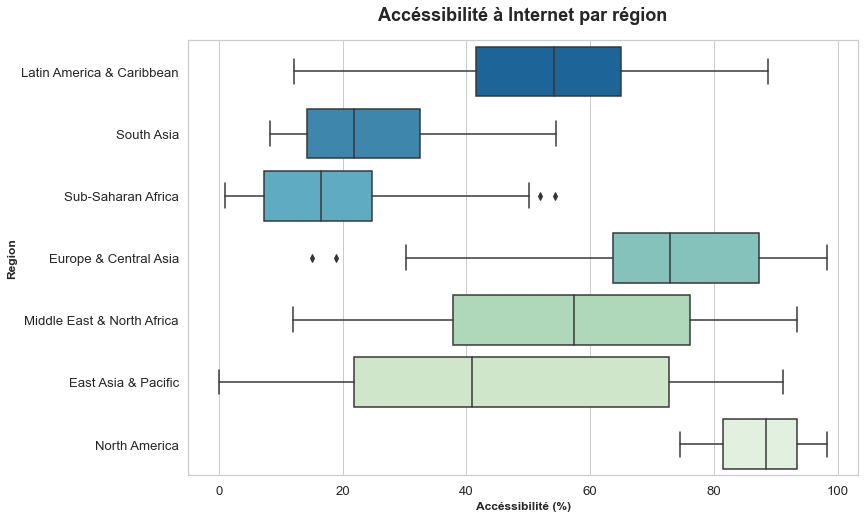

In [95]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Last Avail Values", y="Region",
                 data=df_it_net, palette="GnBu_r", orient="h")
ax.set_title('Accéssibilité à Internet par région')
ax.set(xlabel="Accéssibilité (%)")
plt.show()

> Les régions ayant une meilleure accéssibilité à Internet sont :
>- North America
>- Europe & Central Asia


### Top 20 des pays ayant le meilleur accés à internet

In [96]:
df_it_net.sort_values(by='Last Avail Values', ascending=False).head(20)

,Country Code,Region,Income Group,Country Name,Last Avail Values
25,BMU,North America,High income: nonOECD,Bermuda,98.323610
102,ISL,Europe & Central Asia,High income: OECD,Iceland,98.200000
131,LUX,Europe & Central Asia,High income: OECD,Luxembourg,97.334100
4,AND,Europe & Central Asia,High income: nonOECD,Andorra,96.910000
164,NOR,Europe & Central Asia,High income: OECD,Norway,96.810300
125,LIE,Europe & Central Asia,High income: nonOECD,Liechtenstein,96.641195
54,DNK,Europe & Central Asia,High income: OECD,Denmark,96.330500
72,FRO,Europe & Central Asia,High income: nonOECD,Faroe Islands,94.200000
20,BHR,Middle East & North Africa,High income: nonOECD,Bahrain,93.478301
136,MCO,Europe & Central Asia,High income: nonOECD,Monaco,93.363302


> On retrouve de nombreux pays d'Europe avec un haut pouvoir d'achat. 

## PIB pays

In [109]:
df_raw_gnp = df_raw[df_raw['Indicator Code'] == 'NY.GNP.MKTP.CD']
df_raw_gnp = df_raw_gnp[~df_raw_gnp['Region'].isnull()]
df_raw_gnp = df_raw_gnp[['Country Name', 'Country Code', 'Last Avail Values']]
df_raw_gnp = df_raw_gnp.sort_values(by='Last Avail Values', ascending=False).head(20)

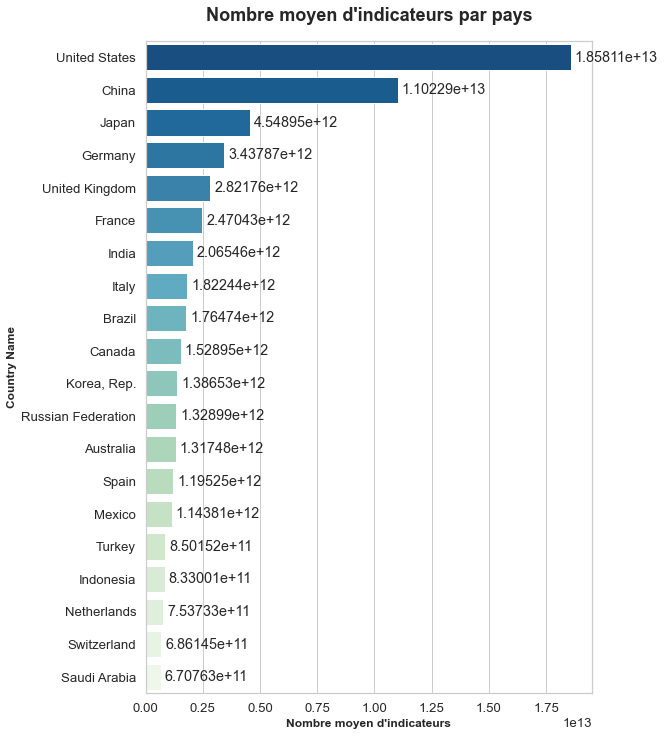

In [110]:
plt.figure(figsize=(8,12))
ax = sns.barplot(data=df_raw_gnp, x="Last Avail Values", y="Country Name", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()